In [15]:
import pandas as pd

In [16]:
# Load the data and encode the utf16
data = pd.read_csv('data.csv',sep='\t',encoding='utf16')

In [17]:
# Prepare data
data = pd.concat([data, data['values'].str.split(',', expand=True)], axis=1)
data = data.drop('values', axis=1)
data = data.rename(columns={"variable_name":"variable",0:"G", 1: "H"})

In [18]:
#Show first 5 rows
data.head()

,Block_Name,Block_Nr,exp_subject_id,rec_session_id,session_nr,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable,G,H
0,block_1,1,106015,113095,1,task_1,1,1598859937759,6,1,Gaze,NaN,NaN
1,block_1,1,106015,113095,1,task_1,1,1598860148676,6,1,Gaze,NaN,NaN
2,block_1,1,106015,113095,1,task_1,1,1598860155790,6,1,Gaze,342.03548431396484,220.88875696063042
3,block_1,1,106015,113095,1,task_1,1,1598860155840,6,1,Gaze,404.5934170484543,203.91145180910826
4,block_1,1,106015,113095,1,task_1,1,1598860155883,6,1,Gaze,350.34265518188477,159.38122496008873


In [19]:
output = {}
current_answer = None
for _,row in data.iterrows():
    if 'answer' in row['variable']:
        current_answer = row['H']
    else:
        output.setdefault('x',[]).append(row['H'])
        output.setdefault('y',[]).append(row['G'])
        output.setdefault('answer',[]).append(current_answer)
data = pd.DataFrame.from_dict(output)
        

In [20]:
data = data.dropna(how='all')
# decimals = pd.Series([0,1], index=['x','y'])
# data = data.round(decimals)
# data = data.x.astype(float);

# data = data.to_csv("ConvertedX_Y.csv")
data.x = data.x.str.extract('(\d+)', expand=False)
data.y = data.y.str.extract('(\d+)', expand=False)
data.x
data.head()
# data.x.astype(int);
# data.y.astype(int);
data = data.astype(float)


data.head(1000)

,x,y,answer
2,220.0,342.0,NaN
3,203.0,404.0,NaN
4,159.0,350.0,NaN
5,183.0,391.0,NaN
6,166.0,352.0,NaN
...,...,...,...
1003,58.0,112.0,NaN
1004,64.0,107.0,NaN
1005,62.0,104.0,NaN
1006,69.0,115.0,NaN


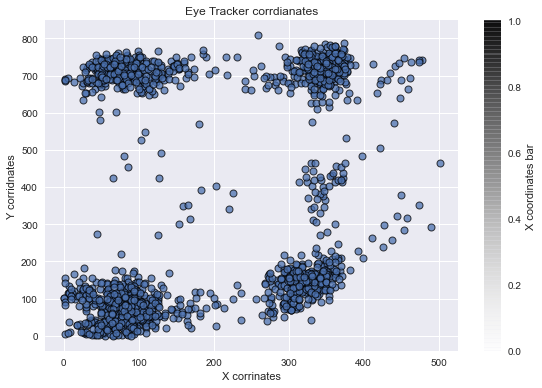

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn')
x_corr = data['x']
y_corr = data['y']
answer = data['answer']

plt.scatter(x_corr, y_corr, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('X coordinates bar')

plt.title('Eye Tracker corrdianates')
plt.xlabel('X corrinates')
plt.ylabel('Y corridnates')

plt.tight_layout()

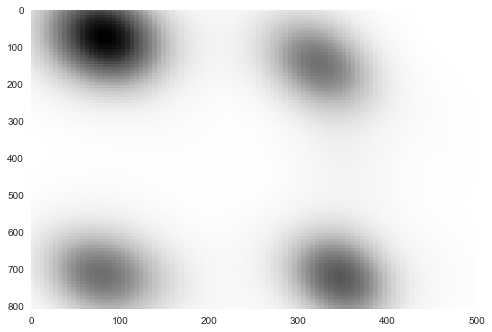

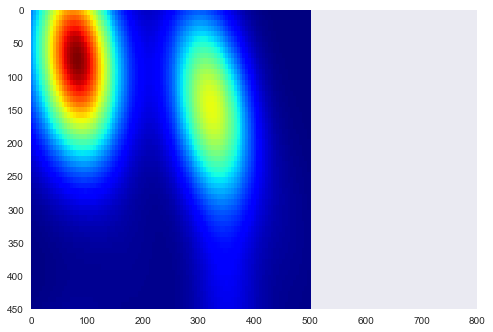

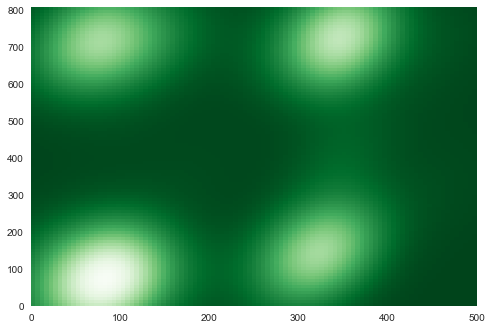

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = data.fillna(0)
plt.style.use('seaborn')
x_corr = data['x']
y_corr = data['y']
answer = data['answer']

# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = x_corr
y = y_corr
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.gca().invert_yaxis()
plt.show()
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.jet)

plt.xlim(0,800)
plt.ylim(0,450)
plt.gca().invert_yaxis()
plt.show()

# Add color bar
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()



# plt.colorbar()

plt.show()



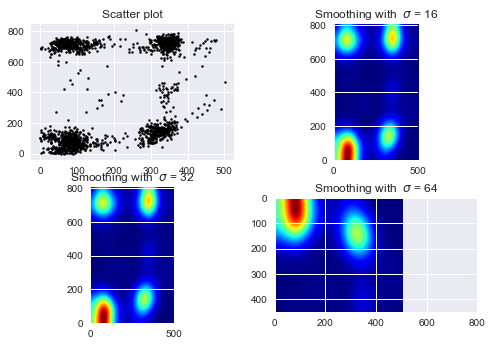

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    
    plt.gca().invert_yaxis()
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent, 


fig, axs = plt.subplots(2, 2)

x_corr = data['x']
y_corr = data['y']

x = x_corr
y = y_corr


sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)


plt.xlim(0,800)
plt.ylim(0,450)
plt.show()